# COMP 755

Plan for today

1. Review Coordinate Descent for Ridge and Lasso
2. Fix-point analysis -- exam question practice
3. Full regularization path solution
4. Least Angle Regression solver for Lasso
5. Issues with Lasso 


$$
\renewcommand{\vvec}[2]{\left[ \begin{array}{c} \mathbf{#1}\\ \mathbf{#2} \end{array}\right]}
\renewcommand{\mmat}[4]{\left[ \begin{array}{cc} \mathbf{#1}&\mathbf{#2}\\ \mathbf{#3}&\mathbf{#4} \end{array}\right]}
\renewcommand{\aaa}{\mathbf{a}}
\renewcommand{\AAA}{\mathbf{A}}
\renewcommand{\xyvec}{\left[ \begin{array}{c} \xx\\\yy \end{array} \right]}
\renewcommand{\xyvecc}{\left[ \begin{array}{c} x^1\\y^1 \end{array} \right]}
\renewcommand{\mm}{\mathbf{m}}
\renewcommand{\xx}{\mathbf{x}}
\renewcommand{\yy}{\mathbf{y}}
\renewcommand{\zz}{\mathbf{z}}
\renewcommand{\vv}{\mathbf{v}}
\renewcommand{\ee}{\mathbf{e}}
\renewcommand{\ww}{\mathbf{w}}
\renewcommand{\XX}{\mathbf{X}}
\renewcommand{\YY}{\mathbf{Y}}
\renewcommand{\WW}{\mathbf{W}}
\renewcommand{\VV}{\mathbf{V}}
\renewcommand{\DD}{\mathbf{D}}
\renewcommand{\dd}{\mathbf{d}}
\renewcommand{\ZZ}{\mathbf{Z}}
\renewcommand{\CC}{\mathbf{C}}
\renewcommand{\bbeta}{\boldsymbol{\mathbf{\beta}}}
\renewcommand{\mmu}{\boldsymbol{\mathbf{\mu}}}
\renewcommand{\ssigma}{\boldsymbol{\mathbf{\sigma}}}
\renewcommand{\reals}{\mathbb{R}}
\renewcommand{\loglik}{\mathcal{LL}}
\renewcommand{\penloglik}{\mathcal{PLL}}
\renewcommand{\likelihood}{\mathcal{L}}
\renewcommand{\Data}{\textrm{Data}}
\renewcommand{\given}{ \big| }
\renewcommand{\MLE}{\textrm{MLE}}
\renewcommand{\EE}{\mathbb{E}}
\renewcommand{\EEE}{\mathbf{E}}
\renewcommand{\KL}{\textrm{KL}}
\renewcommand{\Bound}{\mathcal{B}}
\renewcommand{\tth}{\textrm{th}}
\renewcommand{\Gaussian}[2]{\mathcal{N}\left(#1,#2\right)}
\renewcommand{\norm}[1]{\left\lVert#1\right\rVert}
\renewcommand{\ones}{\mathbf{1}}
\renewcommand{\corr}[2]{\textrm{corr}(#1,#2)}
\renewcommand{\diag}[1]{\textrm{diag}\left( #1 \right)}
\renewcommand{\sigmoid}[1]{\sigma\left(#1\right)}
\renewcommand{\myexp}[1]{\exp\left\{#1\right\}}
\renewcommand{\mylog}[1]{\log\left\{#1\right\}}
\renewcommand{\argmax}{\mathop{\textrm{argmax}}}
\renewcommand{\new}{\textrm{new}}
\renewcommand{\old}{\textrm{old}}
\renewcommand{\bb}{\mathbf{b}}
\renewcommand{\ba}{\mathbf{a}}
\renewcommand{\BB}{\mathbf{B}}
\renewcommand{\BA}{\mathbf{A}}
\renewcommand{\BC}{\mathbf{C}}
\renewcommand{\UU}{\mathbf{U}}
\renewcommand{\uu}{\mathbf{u}}
\renewcommand{\SSS}{\mathbf{S}}
\renewcommand{\sss}{\mathbf{s}}
\renewcommand{\rr}{\mathbf{r}}
\renewcommand{\tr}[1]{\textrm{tr}\left\{#1\right\}}
\renewcommand{\argmin}{\mathop{\textrm{argmin}}}
\renewcommand{\abs}[1]{\left\lvert#1\right\rvert}
\renewcommand{\sign}{\textrm{sign}}
\renewcommand{\minimize}{\mathop{\textrm{minimize}}}
$$



In [1]:
 def draw_contours(b1s,b2s,objective,n=40):
    B1s, B2s = np.meshgrid(b1s,b2s)
    O = np.zeros((len(b1s),len(b2s)))
    for (i,b1) in enumerate(b1s):
        for (j,b2) in enumerate(b2s):
            beta = np.asarray([[b1],[b2]])
            O[i,j] = objective(beta)
    plt.contour(B1s,B2s,O,n)  


# Sparsity in parameters

Optimization of ridge penalized linear regression objective
$$
\overbrace{\underbrace{\frac{1}{2}\norm{\yy - \XX\bbeta}_2^2}_{\textrm{Negative Log Likelihood}} + \underbrace{\frac{\alpha}{2}\sum_j\beta_j^2}_{\textrm{ridge penalty}}}^{\textrm{Ridge Regression}}
$$
does not produce sparse $\bbeta$.

We can consider other functions in place of ridge penalty
$$
\overbrace{\underbrace{\frac{1}{2}\norm{\yy - \XX\bbeta}_2^2}_{\textrm{Negative Log Likelihood}} + 
\underbrace{\lambda\sum_j \abs{\beta_j}}_{\ell_1 \textrm{ penalty}}}^{\textrm{LASSO regression}}.
$$

The name of the penalty stems from $\ell_1$ norm
$$
\norm{\zz}_1 = \sum_j \abs{z_j}.
$$
and **LASSO** stands for Least absolute shrinkage and selection operator.




# Coordinate descent

However, you could also use a simpler approach of updating single $\beta_i$ at a time

For example,

\begin{eqnarray*}
\beta_1^{\new} &=& \argmin_{\color{red}{\beta_1}} f({\color{red}{\beta_1}},\beta^\old_2,\beta^\old_3) \\
\beta_2^{\new} &=& \argmin_{\color{red}{\beta_2}} f(\beta^{\new}_1,{\color{red}{\beta_2}},\beta^\old_3) \\
\beta_3^{\new} &=& \argmin_{\color{red}{\beta_3}} f(\beta^{\new}_1,\beta^{\new}_2,{\color{red}{\beta_3}}) \\
\end{eqnarray*}

and cycling these updates until the changes become small $\sum_j \abs{\beta_j^\new - \beta_j^\old} < \epsilon$

At each step, we update a variable to **optimal** value given the rest.

# Coordinate descent -- derivation procedure

1. Express objective in terms of a single variable ($\beta_k$) while keeping rest fixed
2. Compute partial derivative with respect to the variable
3. Equate the partial derivative zero and solve to obtain the update

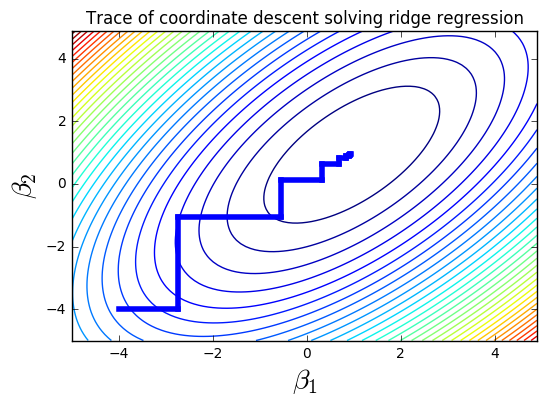

In [370]:
   
def objective(X,y,beta,alpha):
    return ( 0.5*np.sum((y - np.dot(X,beta)) **2.0) 
            + alpha/2.0*np.sum(beta**2.0) )

def update(X,y,beta,alpha,k):      
    beta[k] = 0        
    y_k = y - np.dot(X,beta) # residual since beta[k]=0
    xk = X[:,[k]]    
    beta[k] = np.dot(y_k.T,xk)/(np.dot(xk.T,xk) +  alpha)    
    return beta
    
n = 10
p = 2
np.random.seed(1)
X = np.random.randn(n,p) 

y = 1.0*X[:,[0]]+1.0*X[:,[1]] + 0.1*np.random.randn(n,1)
bs = np.arange(-5,5,0.1)
draw_contours(bs,bs,lambda b: objective(X,y,b,0.1))

beta = np.asarray([[-4.],[-4.]])
for it in range(10):
    for k in range(2):
        beta_old = np.copy(beta)        
        beta = update(X,y,beta,0.1,k)  
        plt.plot([beta_old[0],beta[0]],
                 [beta_old[1],beta[1]],'b',linewidth=4)
        
plt.xlabel('$\\beta_1$',fontsize=20)
plt.ylabel('$\\beta_2$',fontsize=20)
plt.title('Trace of coordinate descent solving ridge regression')
        

# Coordinate descent for penalized linear regression 

Updates for $\beta_k$ variable for Ridge and Lasso

\begin{align}
\beta^{\new}_k  &= \frac{\xx_k^T\yy^{[-k]}}{\xx_k^T\xx_k + \alpha} \tag{Ridge}\\
\beta_k^\new &= S\left(\frac{\xx_k^T\yy^{[-k]}}{\xx_k^T\xx_k},\lambda\right) \tag{Lasso}
\end{align}

where 
$$
y_t^{[-k]} = y_t - \sum_{j\neq k} \beta_j x_{tj} 
$$ 

and 
$$
S(y,\lambda) = \sign(y)\max(\abs{y}-\lambda,0) 
$$



(10L, 1L)


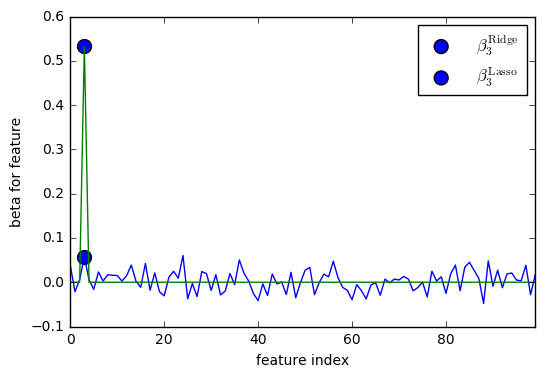

In [108]:
# a toy example
from sklearn.linear_model import Ridge, Lasso
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
np.random.seed(0)
n = 10
p = 100
X = np.random.randn(n,p)
# use fourth feature
y = 1.0*X[:,[3]] + 0.2*np.random.randn(n,1)
print y.shape


# objective is 1/2*||y - X*beta||^2 + alpha||beta||^2
model = Ridge(alpha=1)
model.fit(X,y)
betas = model.coef_[0]
plt.plot(betas)
plt.scatter(3,betas[3],s=100,label=' $\\beta^{\mathrm{Ridge}}_3$ ')

model2 = Lasso(alpha=0.3)
model2.fit(X,y)
betas2 = model2.coef_
plt.plot(betas2)
plt.scatter(3,betas2[3],s=100,label=' $\\beta^{\mathrm{Lasso}}_3$ ')

plt.xlabel('feature index')
plt.ylabel('beta for feature');
plt.xlim([0,p-1])
plt.legend(scatterpoints = 1)


# Fix-point analysis for iterative algorithms

For smooth objectives $\loglik(\bbeta)$ we sought $\bbeta^*$ such that $\nabla_{\bbeta} \loglik(\bbeta^*) = 0$. 

In linear regression $\nabla_{\bbeta} \loglik(\bbeta^*) = 0$ becomes a system of linear equations.

There is another, more general way, way to analyze convergence points of algorithms.

# Fix-point analysis for iterative algorithms

Given an update rule $f$, for example $\beta^{\new} = f(\beta^{\old}),$ an algorithm iterating this update
converges when
$$
\beta^* = f(\beta^*).
$$


A point $x$ for which $f(x) = x$ is called **fix-point** of mapping $f$.

We will perform fix-point analysis of coordinate descent for ridge for a simple case. 

# Fix-point analysis of coordinate descent for Ridge -- toy example

Assume we are given data  $\Data = \{(y_t,[x_{t1},x_{t2}])\mid t=1,..,n\}$ where $x_{t1} = \xx_{t2}$ -- two features are exactly the same. Further assume that $\xx_1$ an d $\xx_2$ are normalized (mean is 0.0, and sum of squares is 1.0). The optimization problem of this ridge regression problem is given by
$$
\minimize_{\beta_1,\beta_2} \frac{1}{2} \norm{\yy  - \xx_{1}\beta_1 - \xx_{2}\beta_2}^2 + \frac{\alpha}{2}(\beta_1^2 + \beta_2^2)
$$

Coordinate descent mapping is given by:

\begin{eqnarray*}
\beta^\new_1 &=& \frac{(\yy - \xx_2\beta^\old_2)^T\xx_1}{1 + \alpha}\\
\beta^\new_2 &=& \frac{(\yy - \xx_1\beta^\new_1)^T\xx_2}{1 + \alpha}
\end{eqnarray*}


In [1]:
import numpy as np
def normalize(x):
    x = x - np.mean(x)
    x = x/np.linalg.norm(x)
    return x

n = 100
np.random.seed(1)
y = np.random.randn(n)
x1 = np.random.randn(n)
x1 = normalize(x1)
x2 = x1

def update_beta1(y,x1,x2,beta1,beta2,alpha):
    return 1./(1. + alpha)*(np.dot(y - beta1*x1,x2))

def update_beta2(y,x1,x2,beta1,beta2,alpha):
    return 1./(1. + alpha)*(np.dot(y - beta2*x2,x1))



# Fix-point analysis of coordinate descent for Ridge
 
 We will express fixpoints for $\beta_1$ and $\beta_2$ by dropping *new* and *old* superscripts. Also we get rid off fractions.
 
\begin{align}
(1 + \alpha)\beta_1 &= (\yy - \xx_2\beta_2)^T\xx_1 \\
(1 + \alpha)\beta_2 &= (\yy - \xx_1\beta_1)^T\xx_2 \\
\end{align}

# Fix-point analysis of coordinate descent for Ridge
 
We simplify fixpoint for $\beta_1$ using the fact that $\xx_1 = \xx_2$ and that $\norm{\xx_1} = \sqrt{\xx_1^T\xx_1} =  1.0$ 

\begin{align}
(1 + \alpha)\beta_1 &=& (\yy - \xx_2\beta_2)^T\xx_1 \\
(1 + \alpha)\beta_1 &=& \yy^T\xx_1 - \beta_2\overbrace{\xx_2^T\xx_1}^{\xx_1^T\xx_1 = 1} \\
(1 + \alpha)\beta_1 &=& \yy^T\xx_1 - \beta_2 \tag{1}
\end{align}

We simplify fixpoint for $\beta_2$ analogously to what we did for $\beta_1$

\begin{align}
(1 + \alpha)\beta_2 &=& \yy^T\xx_2 - \beta_1 \tag{2}\\
\end{align}

# Fix-point analysis of coordinate descent for Ridge

Express $\beta_2$ in the  in terms of $\beta_1$ using Eq.1

\begin{align}
\beta_2 = \yy^T\xx_1 - (1 + \alpha)\beta_1  \tag{3}
\end{align}

Use Eq.3 to rewrite Eq.2 in terms of $\beta_1$ and simplify to obtain closed-form solution for $\beta_1$:

\begin{eqnarray*}
(1 + \alpha)(\yy^T\xx_1 - (1 + \alpha)\beta_1 ) &=& \yy^T\xx_1 - \beta_1 \\
(1 + \alpha)(\yy^T\xx_1) - (1 + \alpha)^2\beta_1  &=& \yy^T\xx_1 - \beta_1 \\
 (1 - (1 + \alpha)^2)\beta_1  &=& (1-(1 + \alpha))\yy^T\xx_1\\
 \beta_1  &=& \frac{(1-(1 + \alpha))}{(1 - (1 + \alpha)^2)}\yy^T\xx_1\\
 \beta_1  &=& \frac{1}{1 + (1 + \alpha)}\yy^T\xx_1\\
 \beta_1  &=& \frac{\yy^T\xx_1}{2 + \alpha}\\
\end{eqnarray*}

Analgously solve for $\beta_2$
$$
 \beta_2  = \frac{\yy^T\xx_2}{2 + \alpha}
$$

# Fix-point analysis of coordinate descent for Ridge

Note, that we could get the same solution by equating gradient of 
$$
\frac{1}{2} \norm{\yy  - \xx_{1}\beta_1 - \xx_{2}\beta_2}^2 + \frac{\alpha}{2}(\beta_1^2 + \beta_2^2)
$$
to zero. 

Recap:
1. Write out the coordinate descent updates either as $\bbeta^{\new} = f(\bbeta^{\old})$
2. Drop $\new$ and $\old$ superscript 
3. Solve the resulting system

In [ ]:
def solve(y,x1,x2,alpha):
    beta1 = np.dot(y.T,x1)/(2.0 + alpha)
    beta2 = np.dot(y.T,x2)/(2.0 + alpha)
    return beta1, beta2

alpha = 0.5
beta1,beta2 = solve(y,x1,x2,alpha)
# are these fix-points?
assert(np.abs(beta1 - update_beta1(y,x1,x2,beta1,beta2,alpha))<1e-7)
assert(np.abs(beta2 - update_beta2(y,x1,x2,beta1,beta2,alpha))<1e-7)

# Fix-point analysis of coordinate descent for Lasso -- toy example

Assume we are given data  $\Data = \{(y_t,[x_{t1},x_{t2}])\mid t=1,..,n\}$ such that $\xx_1^T\xx_2 = 0, \xx_1^T\xx_1 = 1, \xx_2^T\xx_2$. Let $\yy^T\xx_1 = c_1$ and $\yy^T\xx_2 = c_2$, and $c_1>c_2>0$.

For optimization problem
$$
\minimize_{\beta_1,\beta_2} \frac{1}{2} \norm{\yy  - \xx_{1}\beta_1 - \xx_{2}\beta_2}^2 + \lambda(\abs{\beta_1} + \abs{\beta_2}),
$$
figure out which values of $\lambda$ lead to solutions
1. $\beta_1=\beta_2=0$
2. $\beta_1>0,\beta_2=0$
3. $\beta_1>0,\beta_2>0$
4. $\beta_1=0,\beta_2>0$

Take a breath. 

# Reading between the lines

Assume we are given data  $\Data = \{(y_t,[x_{t1},x_{t2}])\mid t=1,..,n\}$ such that $\overbrace{\xx_1^T\xx_2 = 0, \xx_1^T\xx_1 = 1, \xx_2^T\xx_2}^{\color{blue}{\textrm{features are orthonormal}}}$. Let $\yy^T\xx_1 = c_1$ and $\yy^T\xx_2 = c_2$, and $c_1>c_2>0.$ 
<font color='blue'> $\xx_1^T\xx_2 = 0$ means something is going to disappear;
<br>
$\xx_1^T\xx_1 = 1$ means denominators  might be simpler; 
<br>
$c_1>c_2>0$ some sort of asymmetry between $\xx_1$ and $\xx_2$</font>

For optimization problem 
$$
\minimize_{\beta_1,\beta_2} \frac{1}{2} \norm{\yy  - \xx_{1}\beta_1 - \xx_{2}\beta_2}^2 + \lambda(\abs{\beta_1} + \abs{\beta_2}),
$$
<font color='blue'>looks like lasso; can be solved by coordinate descent using shrinkage and thresholding operator</font>

figure out which values of $\lambda$ lead to solutions
1. $\beta_1=\beta_2=0$ <font color='blue'>fix point </font>
2. $\beta_1>0,\beta_2=0$  <font color='blue'> $\beta_2$ of fix point given </font>
3. $\beta_1>0,\beta_2>0$  <font color='blue'> fix point characterized </font>
4. $\beta_1=0,\beta_2>0$  <font color='blue'> $\beta_1$ of fix point characterized; </font>

<font color='blue'> solution for 4. probably not the same as 2. because $c_1>c_2$. </font>

# Fix point analysis of coordinate descent for Lasso

Update
$$
\beta_k^\new = S\left(\frac{\xx_k^T\yy^{[-k]}}{\xx_k^T\xx_k},\lambda\right) \tag{Lasso}
$$
where 
$$
y_t^{[-k]} = y_t - \sum_{j\neq k} \beta_j x_{tj} \tag{residual without $k$th predictor}
$$ and 
$$
S(y,\lambda) = \sign(y)\max(\abs{y}-\lambda,0). \tag{shrinkage and thresholding operator}
$$

Using orthonormality we can simplify to:
$$
\beta_k^\new = S\left(\xx_k^T\yy,\lambda\right).
$$

Will work this out on board.

# Fix point analysis of coordinate descent for Lasso

**Q:** In terms of $y$ and $\lambda$, when is 
$$
S(y,\lambda) = \sign(y)\max(\abs{y}-\lambda,0) = 0?
$$

**Q:** In terms of $y$ and $\lambda$, when is 
$$
S(y,\lambda) = \sign(y)\max(\abs{y}-\lambda,0) > 0?
$$

# Fix point analysis of coordinate descent for Lasso

Using orthonormality
$$
\beta_k^\new = S\left(\xx_k^T\yy,\lambda\right).
$$
we know that $\yy^T\xx_1 = c_1, \yy^T\xx_2 = c_2, c_1>c_2>0$ so
$$
\beta^*_1 = S\left(c_1,\lambda\right)
$$
and
$$
\beta^*_2 = S\left(c_2,\lambda\right).
$$

**Q:** In terms of $c_1,c_2,$ and $\lambda$ when is optimal solution
1. $\beta^*_1 = \beta^*_2 = 0$ ?
2. $\beta^*_1 > \beta^*_2 = 0$ ?
3. $\beta^*_1 > \beta^*_2 > 0$ ?
4. $\beta^*_1 =0, \beta^*_2 > 0$ ?
    

# Fix point analysis of Lasso -- toy example 2

For different values of $\lambda$ in Lasso regression we obtain solutions with different levels of sparsity.

The smallest $\lambda$ for which optimal solution is all zeros is equal to 
$$
\lambda^{\max} = \max_i \frac{|\yy^T\xx_i|}{\xx_i^T\xx_i}
$$

To show this, let $c_i = \frac{|\yy^T\xx_i|}{\xx_i^T\xx_i}$, consider starting coordinate descent with 
$\beta_1=\dots=\beta_p = 0$. 

Since all $\beta$s are zero $\yy^{[-l]} = \yy - \sum_{i\neq l} \beta_i\xx_i = \yy$ 

Consider update for $\beta_k$

\begin{align}
\beta_k^{\new}  &=& S\left(\frac{\xx_k^T\yy^{[-k]}}{\xx_k^T\xx_k},\lambda^{\max}\right) \\
\beta_k^{\new}  &=& S\left(\frac{\xx_k^T\yy}{\xx_k^T\xx_k},\lambda^{\max}\right) \tag{since all betas are 0}\\
\beta_k^{\new}  &=& S\left(c_k,\lambda\right) \tag{by def. of $c_k$}\\
\beta_k^{\new}  &=& \sign(c_k)\max(\abs{c_k}-\lambda^{\max},0) \tag{by def of $S(\cdot  ,\cdot)$}\\
\beta_k^{\new}  &=& \sign(c_k)0 \tag{by def of $\lambda^{\max}$}
\end{align}

Hence, all updates leave $\beta$s at zero.

# Regularization path for penalized regression

For different values of $\lambda$ in Lasso regression we obtain solutions with different levels of sparsity.

<center>Plot of weights vs. sum of absolute values of weight vector achieved for different $\lambda$.</center>
![fig 13.7 b)](lasso-regularization-path.png)




# Full regularization path

Guessing at the level of sparsity for particular $\lambda$ is non-trivial.

We would have to construct a list of candidates and fit the lasso model for each of them.

**Q:** Suppose you know that for $\lambda=1.0$ number of non-zeros (nnz) $\beta$s is 4 and $\lambda=2.0$ nnz $\beta$s is 6. How would you find $\lambda$ for which nnz $\beta$s is 5?

# Least Angle Regression

It turns out that there is relatively elegant algorithm for obtaining the full regularization path without having to guess at $\lambda$ schedule.

Assume predictors $\xx_k$ are normalized (mean 0, norm 1) and $\yy$ is centered (mean 0). 

1. Set $\rr = \yy$
2. $j = \argmax_i \abs{\xx_i^T\yy}$
3. Increase $\beta_j$ in direction of $\xx_j^T\rr$ and update $\rr = \yy - \beta_j\xx_j$ until
$$
\abs{\corr{\xx_j}{\rr}} = \abs{\corr{\xx_l}{\rr} }
$$
for $l\neq j$.
4. Regress $\rr$ onto $\xx_i,\xx_l$ to obtain $b_i,b_l$
5. Increase $\beta_j$ and $\beta_k$ in direction $b_i,b_l$  and update $\rr = \yy - \beta_j\xx_j - \beta_k\xx_k$ until
$$
\abs{\corr{\xx_j^Tb_i + \xx_k b_j}{\rr}} = \abs{\corr{\xx_l^T}{\rr}} 
$$


# Least Angle Regression

![](lars.png)

# Least Angle Regression (LARS)

LARS provides solutions with increasingly many nnz entries.

![](lars-path.png)


# Issues with Lasso

Lasso objective does not spread weights around on correlated predictors.

For example, given two equal predictors $\xx_1 = \xx_2$, Lasso objective
$$
 \frac{1}{2} \norm{\yy  - \xx_{1}\beta_1 - \xx_{2}\beta_2}^2 + \lambda(\abs{\beta_1} + \abs{\beta_2})
 $$
does not have any preference among solutions $(\beta,0)$ $(\beta/2,\beta/2)$ $(0,\beta)$.

Hence, we can not interpret 0 weight as indication of the predictor being uninformative.


# Today

1. Review Coordinate Descent for Ridge and Lasso
2. Fix-point analysis -- exam question practice
3. Full regularization path solution
4. Least Angle Regression solver for Lasso
5. Issues with Lasso

More details on full regularization path methods and coordinate descent:
<a href="http://statweb.stanford.edu/~jhf/ftp/glmnet.pdf">here</a>